In [1]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else x)

In [2]:
df_us= df[(df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])


In [3]:
job_titles = df['job_title_short'].value_counts().index[:6].tolist()
df_us_top_jobs = df_us[df_us['job_title_short'].isin(job_titles)]

In [4]:
df_us_top_jobs_ordered = df_us_top_jobs.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index.tolist()

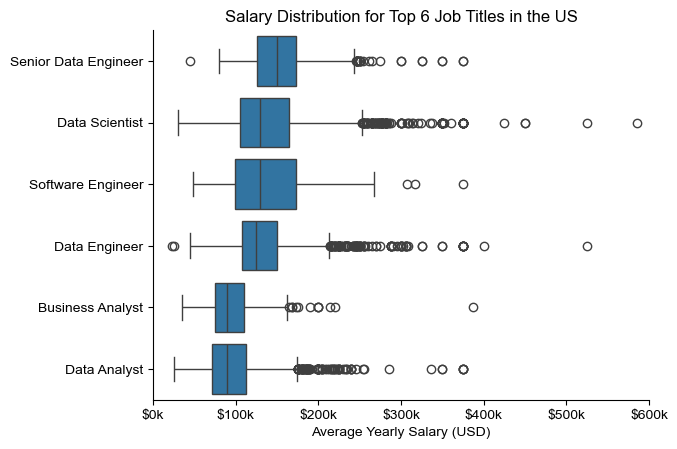

In [5]:
sns.boxplot(data=df_us_top_jobs, x='salary_year_avg', y='job_title_short', order=df_us_top_jobs_ordered )
sns.despine()
sns.set_theme(style="ticks")

plt.xlabel('Average Yearly Salary (USD)')
plt.ylabel('')
plt.title('Salary Distribution for Top 6 Job Titles in the US')
plt.xlim(0, 600000)
ticks_x= plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [9]:
df_DA_us = df_us[(df_us['job_title_short'] == 'Data Analyst') & (df_us['job_country'] == 'United States')].copy()

df_DA_us_top_pay = df_DA_us.dropna(subset=['salary_year_avg'])

In [10]:
df_DA_us_top_pay = df_DA_us_top_pay.explode('job_skills')
df_DA_us_top_pay[['salary_year_avg', 'job_skills']]
df_DA_us_top_pay= df_DA_us_top_pay.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False).head(10)

In [19]:
df_DA_skills = df_DA_us.explode('job_skills')  # Make sure job_skills is a list
df_DA_skills = df_DA_skills.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False).head(10)
df_DA_skills = df_DA_skills.sort_values(by='median', ascending=False) 
df_DA_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


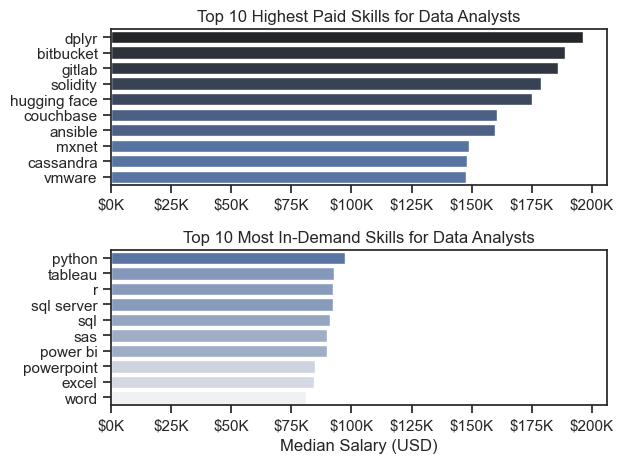

In [21]:
fig, ax = plt.subplots(2, 1)  

sns.set_theme(style='ticks')

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_us_top_pay, x='median', y=df_DA_us_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analystsr')
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()